# Geometric Algorithms

In [1]:
# Settings and imports.
%matplotlib inline
from collections import Counter, OrderedDict, defaultdict
from functools import partial
from itertools import count, combinations
from math import sqrt, pi, sin, cos, atan, radians, degrees
from random import random
from time import time
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageColor
import seaborn as sns

from drawing import VectorImage

-----

# A) Intersections



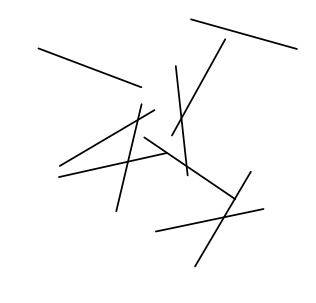

In [2]:
def generate_random_unit_segments(n, size=2.5):
    segments = []
    while len(segments) < n:
        x1 = size * random()
        y1 = size * random()
        alpha = 2 * pi * random()
        x2 = x1 + cos(alpha)
        y2 = y1 + sin(alpha)
        if 0 < x2 < size and 0 < y2 < size:
            segments.append(((x1, y1), (x2, y2)))
    return segments

VectorImage().lines(generate_random_unit_segments(10))

In [26]:
def get_intersection(segment1, segment2, eps=0.0001):
    (xa, ya), (xb, yb) = segment1
    (xc, yc), (xd, yd) = segment2
    denominator = (xa-xb)*(yc-yd) - (ya-yb)*(xc-xd)
    if denominator == 0:
        print('denominator 0')
        return None
    x = ((xa*yb-ya*xb)*(xc-xd) - (xa-xb)*(xc*yd-yc*xd)) / denominator
    y = ((xa*yb-ya*xb)*(yc-yd) - (ya-yb)*(xc*yd-yc*xd)) / denominator
    if not(min(xa, xb) + eps < x < max(xa, xb) - eps):
        return None
    if not(min(xc, xd) + eps < x < max(xc, xd) - eps):
        return None
    return (x, y)

#get_intersection(((0,0), (1,1)), ((0,1), (0.1,0.9)))
get_intersection(((0,0), (1,1)), ((0,1), (1,0)))

(0.5, 0.5)

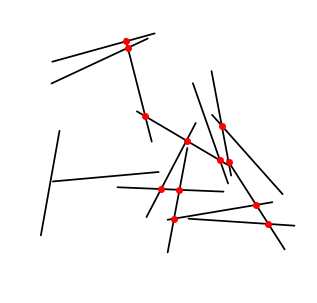

In [5]:
def get_intersections(segments):
    intersections = []
    for s1, s2 in combinations(segments, 2):
        intersection = get_intersection(s1, s2)
        if intersection:
            intersections.append(intersection)
    return intersections

def draw_segments_and_intersections(segments):
    intersections = get_intersections(segments)
    im = VectorImage()
    im.lines(segments)
    im.points(intersections, color='r')

draw_segments_and_intersections(generate_random_unit_segments(15))

-----

# B) Triangulation

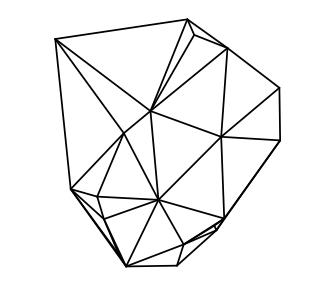

In [64]:
def generate_random_points(n, size=1):
    return [(size*random(), size*random()) for _ in range(n)]

def length(segment):
    (xa, ya), (xb, yb) = segment
    dx = xa - xb
    dy = ya - yb
    return sqrt(dx**2 + dy**2)    

def compute_triangulation(points):
    triangulation = []
    segments = list(combinations(points, 2))
    segments = sorted(segments, key=length)
    for segment in segments:
        not_intersects = all([
            get_intersection(segment, t) is None
            for t in triangulation])
        if not_intersects:
            triangulation.append(segment)
    return triangulation

def draw_triangulation(points):
    triangulation = compute_triangulation(points)
    im = VectorImage()
    im.lines(triangulation)

draw_triangulation(generate_random_points(20))

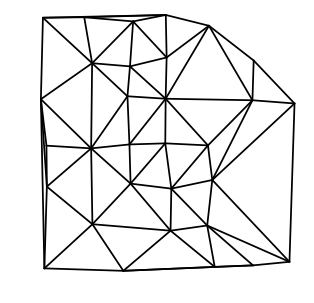

In [30]:
def generate_grid_points(k, noise=0.05, drop_prob=0.2, size=1):
    step = size / (k-1)
    points = [
        (i * step + random() * noise,
         j * step + random() * noise)
         for i in range(k) for j in range(k)
         if random() > drop_prob]
    return points

draw_triangulation(generate_grid_points(k=7))

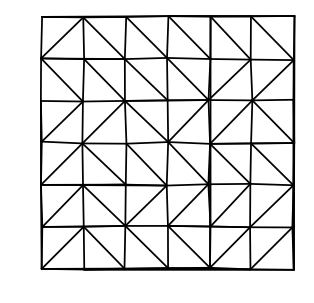

In [67]:
draw_triangulation(generate_grid_points(noise=0.01, drop_prob=0, k=7))

-----

# C) Convex Hull

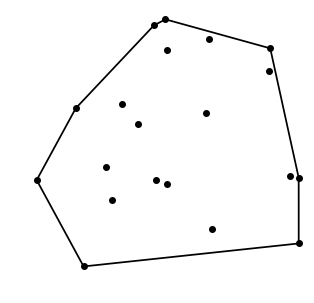

In [8]:
def tangent(a, b):
    """Return tangent of the angle between y-axis and a-b segment.
    """
    dx = b[0] - a[0]
    dy = b[1] - a[1]
    return dy/dx
    
# TODO: Is there a way to unify left and right runs?
def compute_convex_hull(points):
    """Jarvis algorithm to create a convex hull."""
    hull = []
    left = min(points, key=lambda p: p[0])
    right = max(points, key=lambda p: p[0])
    point = left
    # First, go from the left-most point to the right-most point.
    while point != right:
        right_points = [p for p in points if p[0] > point[0]]
        next_point = min(right_points, key=lambda p: tangent(point, p))
        hull.append((point, next_point))
        point = next_point
    # Second, go from the right-most point to the left-most point.
    while point != left:
        left_points = [p for p in points if p[0] < point[0]]
        next_point = min(left_points, key=lambda p: tangent(point, p))
        hull.append((point, next_point))
        point = next_point
    return hull

def draw_convex_hull(points):
    hull = compute_convex_hull(points)
    im = VectorImage()
    im.lines(hull)
    im.points(points, color='k')

draw_convex_hull(generate_random_points(20))

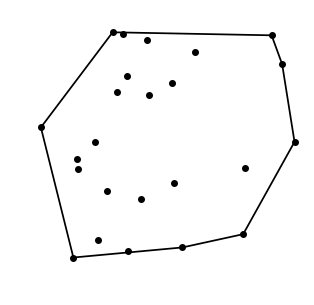

In [35]:
draw_convex_hull(generate_grid_points(k=7, noise=0.2, drop_prob=0.5))

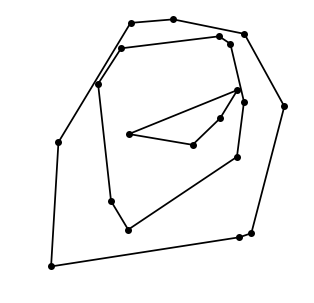

In [58]:
def draw_recursive_convex_hull(points):
    def recursive_hull(points):
        if len(points) <= 1:
            return
        hull = compute_convex_hull(points)
        im.lines(hull)
        hull_points = {segment[0] for segment in hull}
        points = set(points) - hull_points
        recursive_hull(points)
        
    im = VectorImage()
    im.points(points, color='k')
    recursive_hull(points)  

draw_recursive_convex_hull(generate_random_points(20))

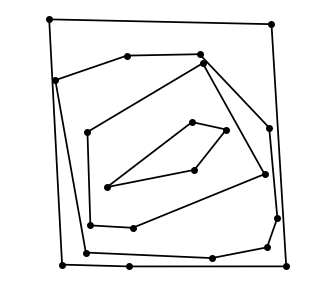

In [59]:
points = generate_grid_points(k=7, noise=0.2, drop_prob=0.5)
draw_recursive_convex_hull(points)